#### Understanding Undersampling 

#### If you have a dataset where you need to classify data into two categories:  
#### - **Category 1** (labeled as **'1'** or **'yes'**) appears **900 times** (majority class).  
#### - **Category 2** (labeled as **'0'** or **'no'**) appears **100 times** (minority class).  


#### Since the number of ‘1’s is much higher than ‘0’s, the model might learn to predict ‘1’ more often because it appears more frequently. This creates an **imbalance**, leading to a biased model that does not learn properly from the minority class.  


---

#### How to Fix This? (Undersampling)  
#### To balance the dataset, we **reduce the number of samples in the majority class ('1')** to match the number of samples in the minority class ('0').  

#### Steps:  
#### 1. Identify the **majority class** (here, ‘1’) and the **minority class** (here, ‘0’).  
#### 2. Randomly **remove extra data points** from the majority class until it has the same number of samples as the minority class.  
####    - In this example, we **reduce '1' from 900 to 100**, so that both classes have **100 samples each**.  
#### 3. Train the model on this **balanced dataset** using a suitable machine learning algorithm.  

---

#### Key Takeaway  
#### Undersampling helps **balance the dataset by reducing the majority class** so the model can learn from both classes fairly. However, since we remove data, we must be careful not to lose important information.


###  Code Example

In [225]:
import numpy as np
import pandas as pd

In [201]:
import matplotlib.pyplot as plt

In [202]:
from sklearn.datasets import make_classification

In [203]:
X, y = make_classification(n_samples=500, n_features=2,n_redundant=0, weights=[0.9, 0.1], random_state=19)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [206]:
from imblearn.under_sampling import RandomUnderSampler

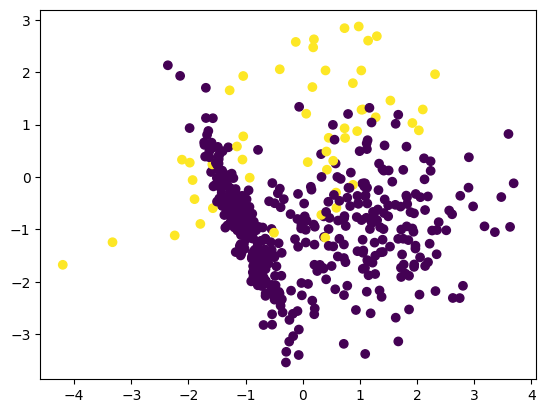

In [207]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

#### Before Sampling

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
clf_before = RandomForestClassifier()
clf_before.fit(X_train,y_train)

RandomForestClassifier()

In [210]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

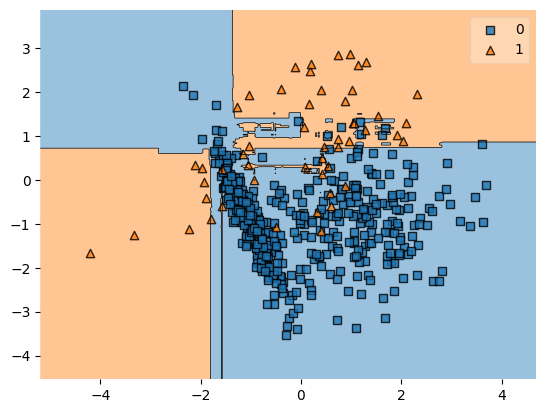

In [211]:
plot_decision_regions(X,y,clf_before)

### After Sampling

In [212]:
rus = RandomUnderSampler(random_state=4)

In [213]:
X_samp, y_samp = rus.fit_resample(X_train,y_train)

In [214]:
#Transformed data 

In [215]:
X_samp.shape

(84, 2)

In [216]:
count_zero = sum(y_samp==0)
count_one = sum(y_samp==1)
print("count of zero: ",count_zero)
print("count of one: ",count_one)

count of zero:  42
count of one:  42


In [217]:
# So the dataset is balanced dataset now so we train this samples

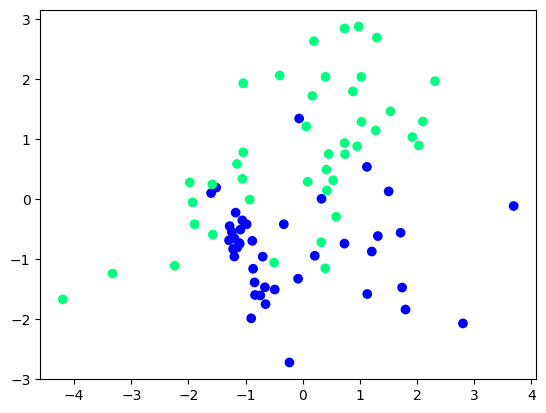

In [218]:
plt.scatter(X_samp[:,0],X_samp[:,1],c=y_samp,cmap='winter')

In [219]:
pd.Series(y_train).value_counts()

0    358
1     42
Name: count, dtype: int64

In [220]:
pd.Series(y_samp).value_counts()

0    42
1    42
Name: count, dtype: int64

In [221]:
clf = RandomForestClassifier()

In [222]:
clf.fit(X_samp,y_samp)

RandomForestClassifier()

<Axes: >

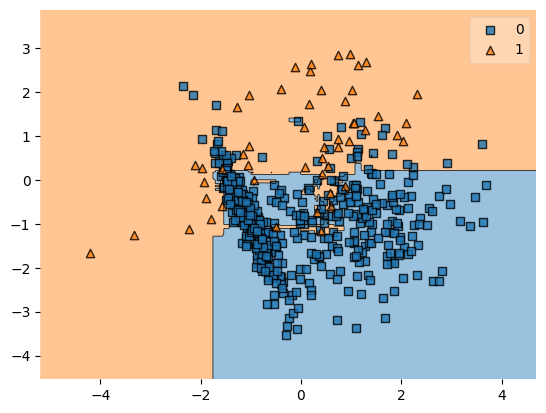

In [223]:
plot_decision_regions(X,y,clf)

In [224]:
# The classification a lot improved so undersampling is very useful

##### Why Do We Do This?  
##### - **To avoid bias:** If the dataset is unbalanced, the model might predict only the majority class.  
##### - **To improve learning:** A balanced dataset helps the model understand both categories equally.  